In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/TEMP150/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0295-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [3]:
lont = lont[290:370,1130]
latt = latt[290:370,1130]
plotvar = plotvar[:,290:370,1130]
#plotvar[plotvar == '--'] = np.nan

In [4]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/depth.nc')
C = data1.variables['z_t'][:]/100
A = C

In [5]:
data2=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/PD/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0295-09.PD.nc')
PD = data2.variables['PD'][0,:,:]

In [6]:
PD = PD[:,290:370,1130]
PD = (PD-1)*1000

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [7]:
nice_cmap=plt.get_cmap('coolwarm')
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,80,100,110,120,140,150,170,190,210,230,240]) 
#lev_cmap = nice_cmap([1,30,50,70,100,130,140,150,160,170,180,190,210,230,240])
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
nice_levels2 = [2000,2500,3000,3500,4000]
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
B= latt
xx, yy = np.meshgrid(B, A)
my_font = {'fontname':'Cambria', 'size':'20'}

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


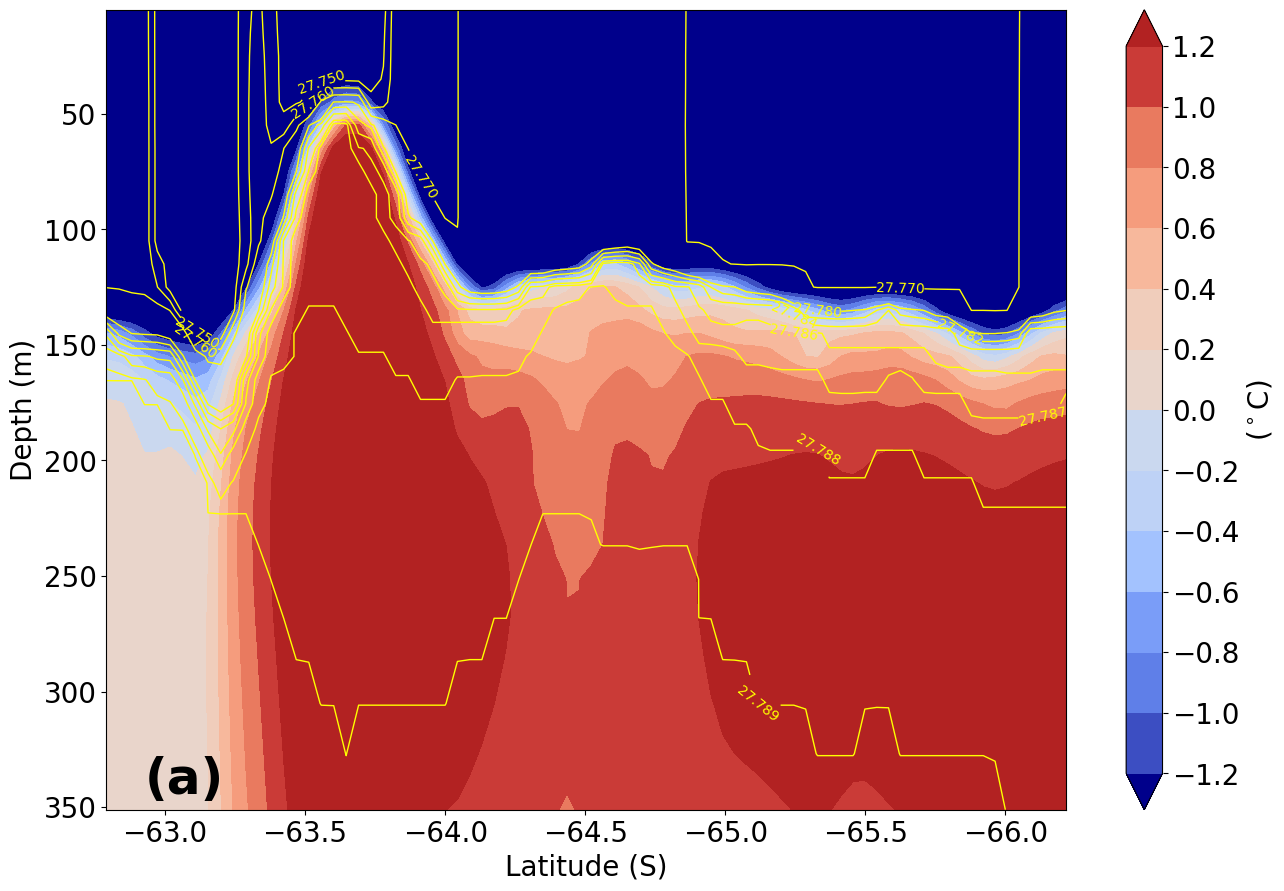

In [8]:
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:29,:], yy[:29,:], plotvar[:29,:],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("black")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
CS = ax0.contour(xx[:29,:], yy[:29,:], PD[:29,:],[27.74,27.75,27.76,27.77,27.78,27.782,27.784,27.786,27.787,27.788,27.789],colors = 'yellow', linestyles = 'solid',linewidths=1)
plt.clabel(CS, fontsize=10)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('($^\circ$C)', **my_font)
#ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
#plt.xticks(range(0,120,20), ['66.2$^\circ$S', '65.3$^\circ$S', '64.5$^\circ$S','63.6$^\circ$S','62.8$^\circ$S'])
#plt.yticks(range(0,61,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968','3133','4375','5625'])
plt.xticks(**my_font)
plt.yticks(**my_font)
plt.xlabel('Latitude (S)',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
#ax0.set_title('Temperature',**my_font)
ax0.invert_xaxis()
ax0.text(0.04, 0.02, '(a)', transform=ax0.transAxes,size=36, weight='bold')
plt.savefig("Sea001.png",bbox_inches='tight')